# Analisis temporal de los datos de Trocafone

In [3]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
#Traemos el csv y convertimos su columna de tiempo en un datetime
df = pd.read_csv('events.csv', low_memory=False)
df['timestamp']=pd.to_datetime(df['timestamp'])

In [5]:
#Demostracion: No hay eventos nulos asociados a fechas
events = df['event']
dates = df['timestamp']

print((events.count()) == (events.size))
print((dates.count()) == (dates.size))

# Si ambos son True los eventos se corresponden 1 a 1 con las fechas

True
True


## Que dia de la semana tiene mas trafico de eventos

In [6]:
df['diasemana'] = df['timestamp'].dt.weekday

In [7]:
#Cuenta las ocurrencias de cada dia de la semana, de Lunes a Domingo sin ordenar
dfDiasYEventos= (df['diasemana'].value_counts(normalize=True, sort=False)*100).to_frame()
dfDiasYEventos['dia'] = dfDiasYEventos.index
dfDiasYEventos = dfDiasYEventos.replace(0,'Lunes').replace(1,'Martes').replace(2,'Miercoles').replace(3,'Jueves').replace(4,'Viernes').replace(5,'Sabado').replace(6,'Domingo')

#Cambiamos el indice a lo reemplazado
dfDiasYEventos= dfDiasYEventos.set_index(['dia'])
dfDiasYEventos.columns= ['PorcentajeEventos']
dfDiasYEventos

,PorcentajeEventos
dia,
Lunes,14.771756
Martes,16.812224
Miercoles,16.248883
Jueves,16.006123
Viernes,14.770372
Sabado,11.333270
Domingo,10.057372


Text(0,0.5,'Cantidad de eventos (%)')

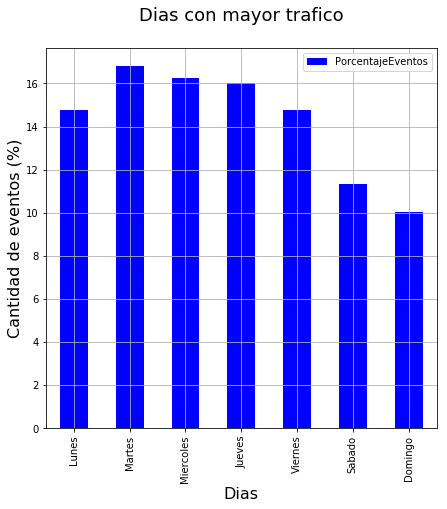

In [10]:
plt1 = dfDiasYEventos.plot(kind = 'bar',color='blue', grid=True,figsize =(7,7),legend = True)
plt1.set_title('Dias con mayor trafico\n', fontsize = 18)
plt1.set_xlabel("Dias",fontsize = 16)
plt1.set_ylabel("Cantidad de eventos (%)",fontsize = 16)

# Horario de mayor trafico de usuarios en Trocafone

In [19]:
df['horaDelDia'] = df['timestamp'].dt.hour
a = df.loc[df['event']=='viewed product']
a = df['horaDelDia'].value_counts()


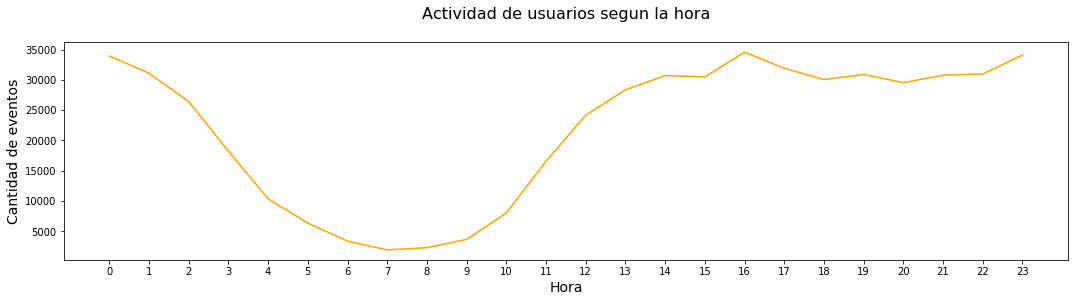

In [20]:
productosVistos = df.loc[df['event']=='viewed product']
horarios = productosVistos['timestamp'].dt.hour.value_counts().sort_index()
plt.figure(figsize = (18,4))
g = horarios.plot(xticks= range(0,24), color = 'orange')
g.set_title('Actividad de usuarios segun la hora\n', fontsize=16)
g.set_xlabel('Hora', fontsize=14)
g.set_ylabel('Cantidad de eventos', fontsize=14);


#### Teniendo en cuenta que el evento predominante dentro de nuestro set de datos est Viewed Product. La gente suele mirar mas celulares en el horario de las 16 hs


# Mes de mayor cantidad de ventas

In [13]:
import calendar
df['meses'] = df['timestamp'].dt.month
b = df.loc[df['event']=='conversion']
df['meses'] = df['meses'].map(lambda x: calendar.month_abbr[x])
b = df['meses'].value_counts()

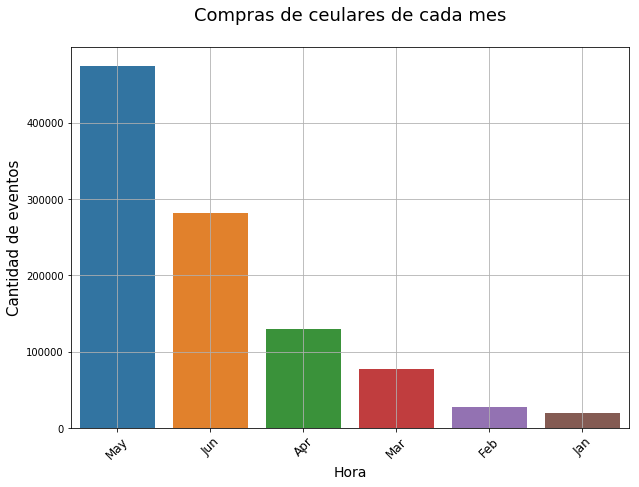

In [17]:
plt.figure(figsize = (10,7))
g = sns.barplot(x= b.index, y=b.values, orient= 'v')
g.set_title('Compras de ceulares de cada mes\n', fontsize=18)
g.set_xlabel('Hora', fontsize=14)
g.set_ylabel('Cantidad de eventos', fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize=12)
g.grid(True)

# Cantidad de eventos por horario segun el dia de la semana

In [11]:
#La idea aca es hacer un heatmap que tenga los eventos por semana segun el horario, eje X eventos, eje Y horario y el hetmap

In [21]:
diahora = df[['diasemana','horaDelDia']]
diahora['suma'] = 1

/home/nicolas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
hmp = diahora.pivot_table(index='horaDelDia',columns='diasemana',values='suma',aggfunc='sum')
hmp.columns = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
hmp = hmp.sort_index(ascending=True)

Text(0.5,1,'Eventos por dia de la semana segun hora del dia\n')

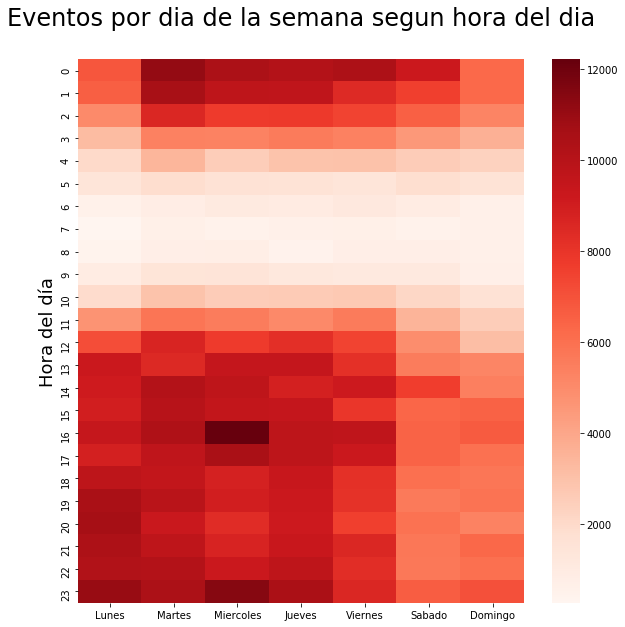

In [27]:
plt.figure(figsize = (10,10))
g = sns.heatmap(hmp,cmap='Reds')
g.set_ylabel('Hora del día',size=18)
g.set_title('Eventos por dia de la semana segun hora del dia\n',size=24)

# Visitas en funcion del mes

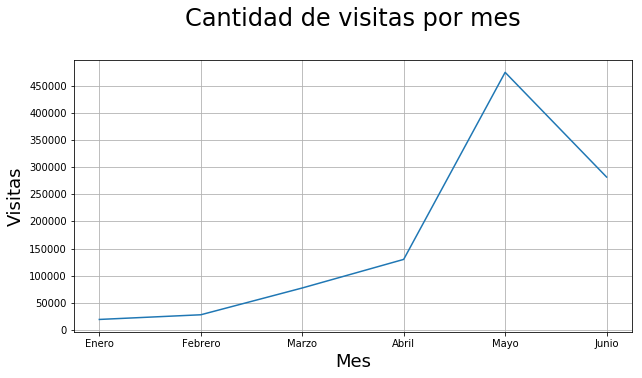

In [26]:
df['time'] = pd.to_datetime(df['timestamp'])
df['month'] = df['time'].dt.month

visitas = df['month'].value_counts().sort_index()
visitas.index = ['Enero','Febrero','Marzo','Abril','Mayo','Junio']

fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=5
plt.rcParams["figure.figsize"] = fig_size
plt.yticks(range(0,500000,50000))
plt.grid()
plt.plot(visitas)
plt.title('Cantidad de visitas por mes\n',size=24)
plt.ylabel('Visitas',size=18)
plt.xlabel('Mes',size=18)
plt.show()

# ¿Los datos de Junio estan incompletos?

In [28]:
df['dia'] = df['time'].dt.day
junio = df.loc[df['month']==6]
dias = junio['dia'].value_counts().sort_index()
d = dias.to_frame()
d.columns = ['Cant. Eventos']
d

,Cant. Eventos
1,20528
2,19113
3,16630
4,22651
5,25705
6,22281
7,22879
8,18442
9,15493
10,13122


#### Se puede apreciar que los datos de junio estan completos unicamente hasta el dia 15

# Compras por horario en la semana

In [29]:
compras = df.loc[df.event=='conversion']

In [30]:
compras['suma'] = 1

/home/nicolas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
heat = compras.pivot_table(index='horaDelDia',columns='diasemana',values='suma',aggfunc='sum')

In [32]:
heat.columns = ['Lun','Mar','Mie','Jue','Vie','Sab','Dom']

Text(69,0.5,'Hora del dia')

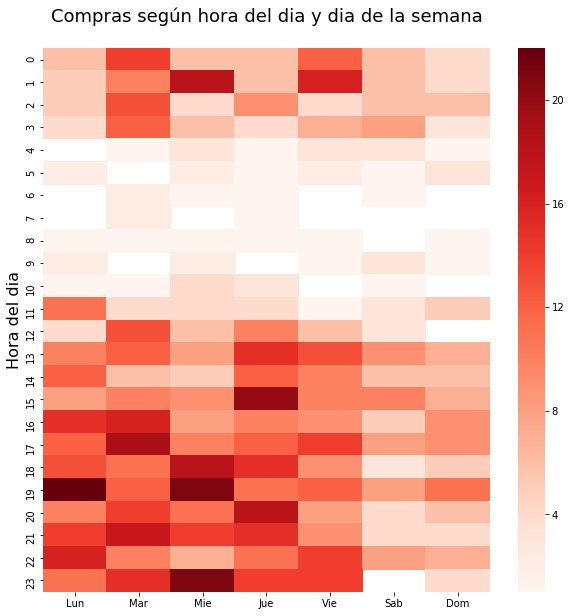

In [38]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(heat,cmap='Reds',ax=ax)
plt.title('Compras según hora del dia y dia de la semana\n',size=18)
plt.ylabel('Hora del dia',size=16)